In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the data set into python environment
heart = pd.read_csv('Heart_Disease_Data.csv',na_values="?")
heart.head()

,Age,Gender,CP,Rest_BPS,Cholestrol,FBS,Rest_ECG,Thalach,Exang,Old_Peak,Slop,CA,Thal,Heart_Pain_level
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


### Let's analyse the data 

In [3]:
#Target variable...
heart['Heart_Pain_level'].value_counts()
#Value 0: < 50% diameter narrowing
#Value 1: > 50% diameter narrowing (in any major vessel: attributes 59 through 68 are vessels)

0    164
1     55
2     36
3     35
4     13
Name: Heart_Pain_level, dtype: int64

In [4]:
heart['Heart_Pain_level'].replace(inplace=True, value=[1, 1, 1, 1], to_replace=[1, 2, 3, 4])

In [5]:
heart.info()                               #checking for null values if any...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
Age                 303 non-null int64
Gender              303 non-null int64
CP                  303 non-null int64
Rest_BPS            303 non-null int64
Cholestrol          303 non-null int64
FBS                 303 non-null int64
Rest_ECG            303 non-null int64
Thalach             303 non-null int64
Exang               303 non-null int64
Old_Peak            303 non-null float64
Slop                303 non-null int64
CA                  299 non-null float64
Thal                301 non-null float64
Heart_Pain_level    303 non-null int64
dtypes: float64(3), int64(11)
memory usage: 33.2 KB


In [6]:
heart.tail()

,Age,Gender,CP,Rest_BPS,Cholestrol,FBS,Rest_ECG,Thalach,Exang,Old_Peak,Slop,CA,Thal,Heart_Pain_level
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [7]:
heart["CA"].fillna(heart["CA"].mode()[0], inplace=True)
heart["Thal"].fillna(heart["Thal"].mode()[0], inplace=True)

In [8]:
heart.describe().transpose()          

,count,mean,std,min,25%,50%,75%,max
Age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
Gender,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
CP,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
Rest_BPS,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
Cholestrol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
FBS,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
Rest_ECG,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
Thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
Exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
Old_Peak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


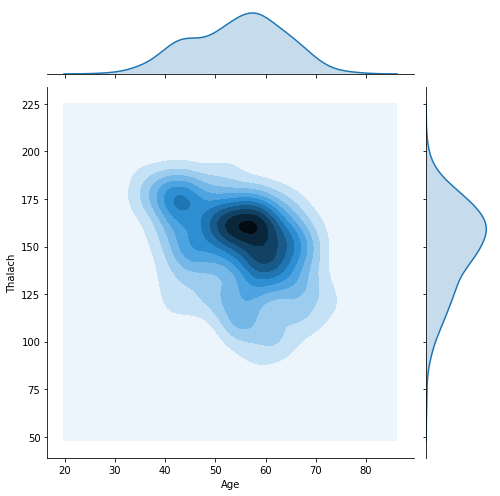

In [9]:
#heart rate as compared with age - Higher density around the age of 60
sns.jointplot(heart.Age,heart.Thalach,kind="kde", size=7)

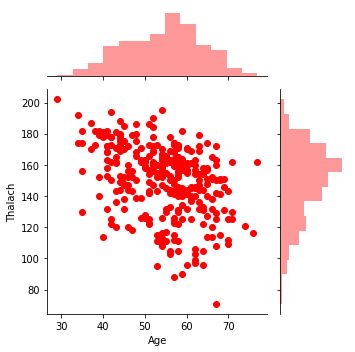

In [10]:
sns.jointplot(heart.Age, heart.Thalach, data=heart,size=5, ratio=3, color="r")

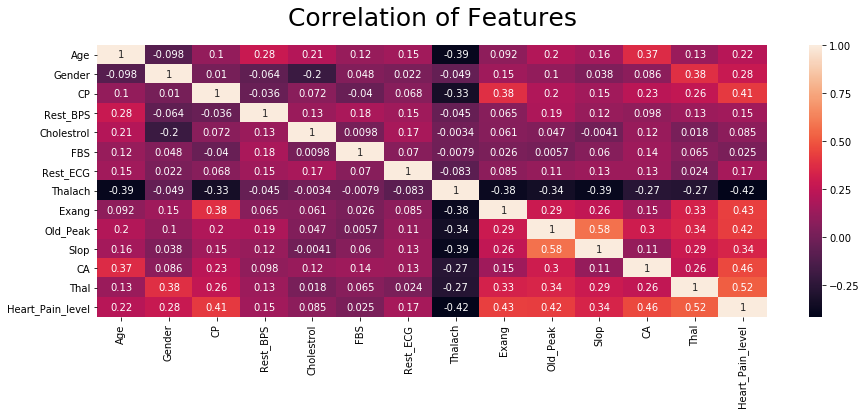

In [11]:
#Correlation among the features
sns.heatmap(heart[heart.columns[:14]].corr(),annot=True)
fig=plt.gcf()
fig.set_size_inches(15,5)
plt.title('Correlation of Features', y=1.05, size=25)
plt.show()

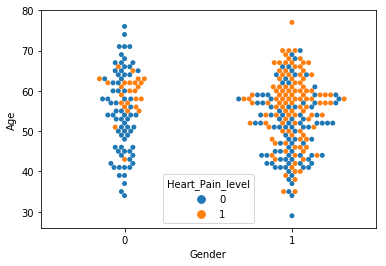

In [12]:
sns.swarmplot(x='Gender', y='Age',hue='Heart_Pain_level', data=heart)
plt.show()

Majority of the people having heart diseases are males.

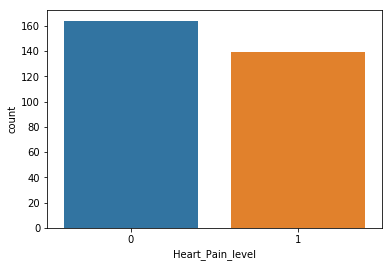

In [13]:
sns.countplot(x=heart.Heart_Pain_level,data=heart)
plt.show()

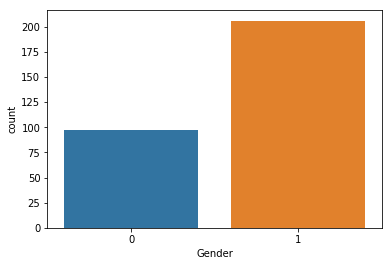

In [14]:
sns.countplot(heart.Gender)
plt.show()

In [15]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
Age                 303 non-null int64
Gender              303 non-null int64
CP                  303 non-null int64
Rest_BPS            303 non-null int64
Cholestrol          303 non-null int64
FBS                 303 non-null int64
Rest_ECG            303 non-null int64
Thalach             303 non-null int64
Exang               303 non-null int64
Old_Peak            303 non-null float64
Slop                303 non-null int64
CA                  303 non-null float64
Thal                303 non-null float64
Heart_Pain_level    303 non-null int64
dtypes: float64(3), int64(11)
memory usage: 33.2 KB


In [16]:
#features_continuous=heart[["Age", "Rest_BPS",'Thalach',"Cholestrol", "Old_Peak", "Heart_Pain_level"]]
#sns.pairplot(features_continuous,hue=heart['Heart_Pain_level'],diag_kind='kde')
#plt.show()

### Data preparation & model building 

In [17]:
from sklearn.model_selection import cross_val_score # Cross Validation Score
from sklearn.model_selection import GridSearchCV # Parameters of the Model
from sklearn.model_selection import RandomizedSearchCV # Tuning the Parameters
from sklearn.tree import DecisionTreeClassifier # Decision Tree Algo
from sklearn.ensemble import RandomForestClassifier # Random Forest Algo.
from sklearn.model_selection import train_test_split # helps in spliting the data in train and test set
from sklearn.metrics import accuracy_score # Calculating the Accuracy Score againts the Classes Predicted vs Actuals.
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [18]:
heart.head()

,Age,Gender,CP,Rest_BPS,Cholestrol,FBS,Rest_ECG,Thalach,Exang,Old_Peak,Slop,CA,Thal,Heart_Pain_level
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [19]:
heart=pd.get_dummies(heart,columns=(['Gender','CP','FBS','Rest_ECG',
                           'Exang','Slop']),drop_first=True)

In [20]:
heart.head()

,Age,Rest_BPS,Cholestrol,Thalach,Old_Peak,CA,Thal,Heart_Pain_level,Gender_1,CP_2,CP_3,CP_4,FBS_1,Rest_ECG_1,Rest_ECG_2,Exang_1,Slop_2,Slop_3
0,63,145,233,150,2.3,0.0,6.0,0,1,0,0,0,1,0,1,0,0,1
1,67,160,286,108,1.5,3.0,3.0,1,1,0,0,1,0,0,1,1,1,0
2,67,120,229,129,2.6,2.0,7.0,1,1,0,0,1,0,0,1,1,1,0
3,37,130,250,187,3.5,0.0,3.0,0,1,0,1,0,0,0,0,0,0,1
4,41,130,204,172,1.4,0.0,3.0,0,0,1,0,0,0,0,1,0,0,0


In [21]:
# Defined my Xs and Ys
x = heart.drop('Heart_Pain_level', axis = 1) # Dropping the Target Variable
y = heart['Heart_Pain_level'] # Defining the Ys...

# Train & Test Split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = 123)

In [22]:
tree = DecisionTreeClassifier()

In [23]:
# Defining Tree Parameters For Grid Based Search:
tree_param = {
    "criterion":["gini", "entropy"],
    "splitter":["best", "random"],
    "max_depth":[3,4,5,6],
    "max_features":["auto","sqrt","log2"],
    "random_state": [123]
}

In [24]:
# Applying the Grid Search Algorithm
grid = GridSearchCV(tree, tree_param, cv = 10)

In [25]:
# Printing the Parameters after Grid Based Search
grid

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [3, 4, 5, 6], 'max_features': ['auto', 'sqrt', 'log2'], 'random_state': [123]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [26]:
# Lets Fit into the Data so that It can let us know the correct Parameters 
best_parameter_search = grid.fit(x_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [27]:
best_parameter_search.best_params_ # Printing the Best Parameters

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'random_state': 123,
 'splitter': 'random'}

In [28]:
# Creating our First Model Called Decision Trees after Hyper Tuning
tree = DecisionTreeClassifier(criterion ='gini',
 max_depth=6,
 max_features= 'auto',
 random_state= 123,
 splitter='random')

In [29]:
# Developing the Model 
model_tree = tree.fit(x_train, y_train) # Fitting the Learner on Train Dataset.
pred_TREE = tree.predict(x_test) # Making Predictions
accuracy_score(y_test, pred_TREE) # Calculating Accuracy

0.7912087912087912

### Decision Model returns an Accuracy of 0.79

In [30]:
# Lets Fit in the Bagging Classifier and See what do we get
bagg = BaggingClassifier()
baggedmodel = bagg.fit(x_train, y_train)

In [31]:
# Making Predictions...
pred_bagged = bagg.predict(x_test)

In [32]:
# Calculating Accuracy
accuracy_score(y_test, pred_bagged)

0.7252747252747253

### Bagging Model returns an Accuracy of 0.747

In [33]:
# Lets Apply Boosting Here

ada = AdaBoostClassifier(algorithm= 'SAMME',
 learning_rate= 1,
 n_estimators= 75,
 random_state= 123)

In [34]:
ada_model = ada.fit(x_train, y_train)
pred_ada = ada.predict(x_test)
accuracy_score(y_test, pred_ada)

0.7692307692307693

In [35]:
import xgboost as xgb
from xgboost import XGBClassifier
xg = XGBClassifier()

In [36]:
# Apply XGBOOST at Base Level
model_xgb = xg.fit(x_train, y_train)

In [37]:
pred_xgb = xg.predict(x_test)

In [38]:
accuracy_score(y_test,pred_xgb)

0.7582417582417582

In [39]:
tree = DecisionTreeClassifier()
cross_val_score(tree, x, y, cv=10).mean()

0.7245494994438264

In [40]:
RF = RandomForestClassifier()
cross_val_score(RF, x, y, cv=10).mean()

0.8182424916573972

In [41]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
cross_val_score(lg, x, y, cv = 10).mean()

0.857704857248795

In [42]:
ada = AdaBoostClassifier() # Bias but also variance too...
cross_val_score(ada, x,y, cv = 10).mean()
# What if I make an ensemble of RF and ADABOOST.

0.8008083055246569

In [43]:
gbm = GradientBoostingClassifier()
cross_val_score(gbm, x, y, cv = 10).mean()

0.8174823878383389

In [44]:
from xgboost import XGBClassifier
xg = XGBClassifier()
cross_val_score(xg, x, y, cv = 10).mean()

0.8111383018168334

In [45]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[("ADA", ada),("GBM", gbm), ("XGB", xg)])

In [46]:
cross_val_score(vc, x, y, cv=5).mean()

0.8182272853570435